# 深入浅出PyTorch

## 第一部分：PyTorch深度学习基础知识
  1. PyTorch简介与安装
  2. PyTorch基础知识
  3. PyTorch的主要组成模块
  4. 基础实战——Fashion-MNIST时装分类
  
## 第二部分：PyTorch进阶操作与生态系统介绍
  1. 定义PyTorch模型保存、加载
  2. PyTorch进阶训练技巧
  3. PyTorch可视化
  4. PyTorch可视化
  5. PyTorch生态
  
## 第三部分：PyTorch实战练习
  1. 语义分割的快速实现
  2. NLP ：情感分析
  3. 图神经网络
  4. 医学影像
  5. (比赛)
  

### 第二讲 PyTorch基础知识
2.1张量
- Scalar Vector Matrix Tensor
- Tensor可以是高维的
- PyTorch运算的基础单元
- 基础数据定义和运算
- 在PyTorch中支持GPU运算，自动求导等操作

 

- 代码演示部分
- 第一部分：张量运算演示示例
- Tensor的一些基本操作

In [1]:
import torch

In [2]:
?torch.tensor

data:数据 dtype：类型 device：可以换成CPU requires_grad：是否允许求导 pin_memory：拿时间换空间

In [7]:
# 创建tensor,用dtype指定类型，注意类型要匹配
a=torch.tensor(1.0,dtype=torch.float)
b=torch.tensor(1,dtype=torch.long)
c=torch.tensor(1.0,dtype=torch.int8)
print(a,b,c)

tensor(1.) tensor(1) tensor(1, dtype=torch.int8)


In [8]:
#使用指定类型的函数随机初始化指定大小的tensor
d=torch.FloatTensor(2,3)#两行三列
e=torch.IntTensor(2)#两个数
f=torch.IntTensor([1,2,3,4])#指定的数
print(d,'\n',e,'\n','\n',f)

tensor([[0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([1, 0], dtype=torch.int32) 
 
 tensor([1, 2, 3, 4], dtype=torch.int32)


In [9]:
#tensor和numpy array之间的相互转换
import numpy as np

g=np.array([[1,2,3],[4,5,6]])
h=torch.tensor(g)
print(h)
i=torch.from_numpy(g)
print(i)
j=h.numpy()
print(j)

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)
[[1 2 3]
 [4 5 6]]


In [10]:
#常见的构造Tensor函数
k=torch.rand(2,3)
l=torch.ones(2,3)
m=torch.zeros(2,3)
n=torch.arange(0,10,2)
print(k,"\n",l,"\n",m,"\n",n)

tensor([[0.7862, 0.3851, 0.5470],
        [0.5624, 0.6598, 0.2640]]) 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([0, 2, 4, 6, 8])


In [11]:
#查看tensor的维度信息，
print(k.shape)
print(k.size())

torch.Size([2, 3])
torch.Size([2, 3])


In [12]:
#tensor的运算
o=torch.add(k,l)
print(o)

tensor([[1.7862, 1.3851, 1.5470],
        [1.5624, 1.6598, 1.2640]])


In [13]:
#tensord的索引方式与nummpy类似
print(o[:,1])
print(o[0,1])


tensor([1.3851, 1.6598])
tensor(1.3851)


In [15]:
#改变tensor形状的神器：view
print(o.view((3,2)))
print(o.view(-1,2))
#这里是啥意思呢，就是如果你确定第二个维度是多少，可以利用-1直接算出相应的维度

tensor([[1.7862, 1.3851],
        [1.5470, 1.5624],
        [1.6598, 1.2640]])
tensor([[1.7862, 1.3851],
        [1.5470, 1.5624],
        [1.6598, 1.2640]])


In [16]:
#tensor的广播机制（要注意不要被坑了）
p=torch.arange(1,3).view(1,2)
print(p)
q=torch.arange(1,4).view(3,1)
print(q)
print(p+q)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


In [17]:
#扩展&压缩tensor的维度：squeeze
print(o)
r=o.unsqueeze(1)
print(r)
print(r.shape)
#只能对该维度为1进行squeeze

tensor([[1.7862, 1.3851, 1.5470],
        [1.5624, 1.6598, 1.2640]])
tensor([[[1.7862, 1.3851, 1.5470]],

        [[1.5624, 1.6598, 1.2640]]])
torch.Size([2, 1, 3])


In [19]:
s=r.squeeze(1)#这里注意
print(s)
print(r.shape)

tensor([[1.7862, 1.3851, 1.5470],
        [1.5624, 1.6598, 1.2640]])
torch.Size([2, 1, 3])


## 2.2自动求导（重点）
- PyTorch实现模型训练
  - 输入数据，正向传播
  - 同时创建计算图
  - 计算损失函数
  - 损失函数反向传播（**求导**）
  - 更新参数
- Tensor实现自动求导的数学基础

## 2.2自动求导——数学基础
- 多元函数求导的雅克比矩阵
- 复合函数求导的链式法则
 - 若h(x)=f(g(x)),则h'(x)=f'(g(x))g'(x)
- PyTorch自动求导提供了计算雅各比乘积的工具
  损失函数l对输出y的导数是：
  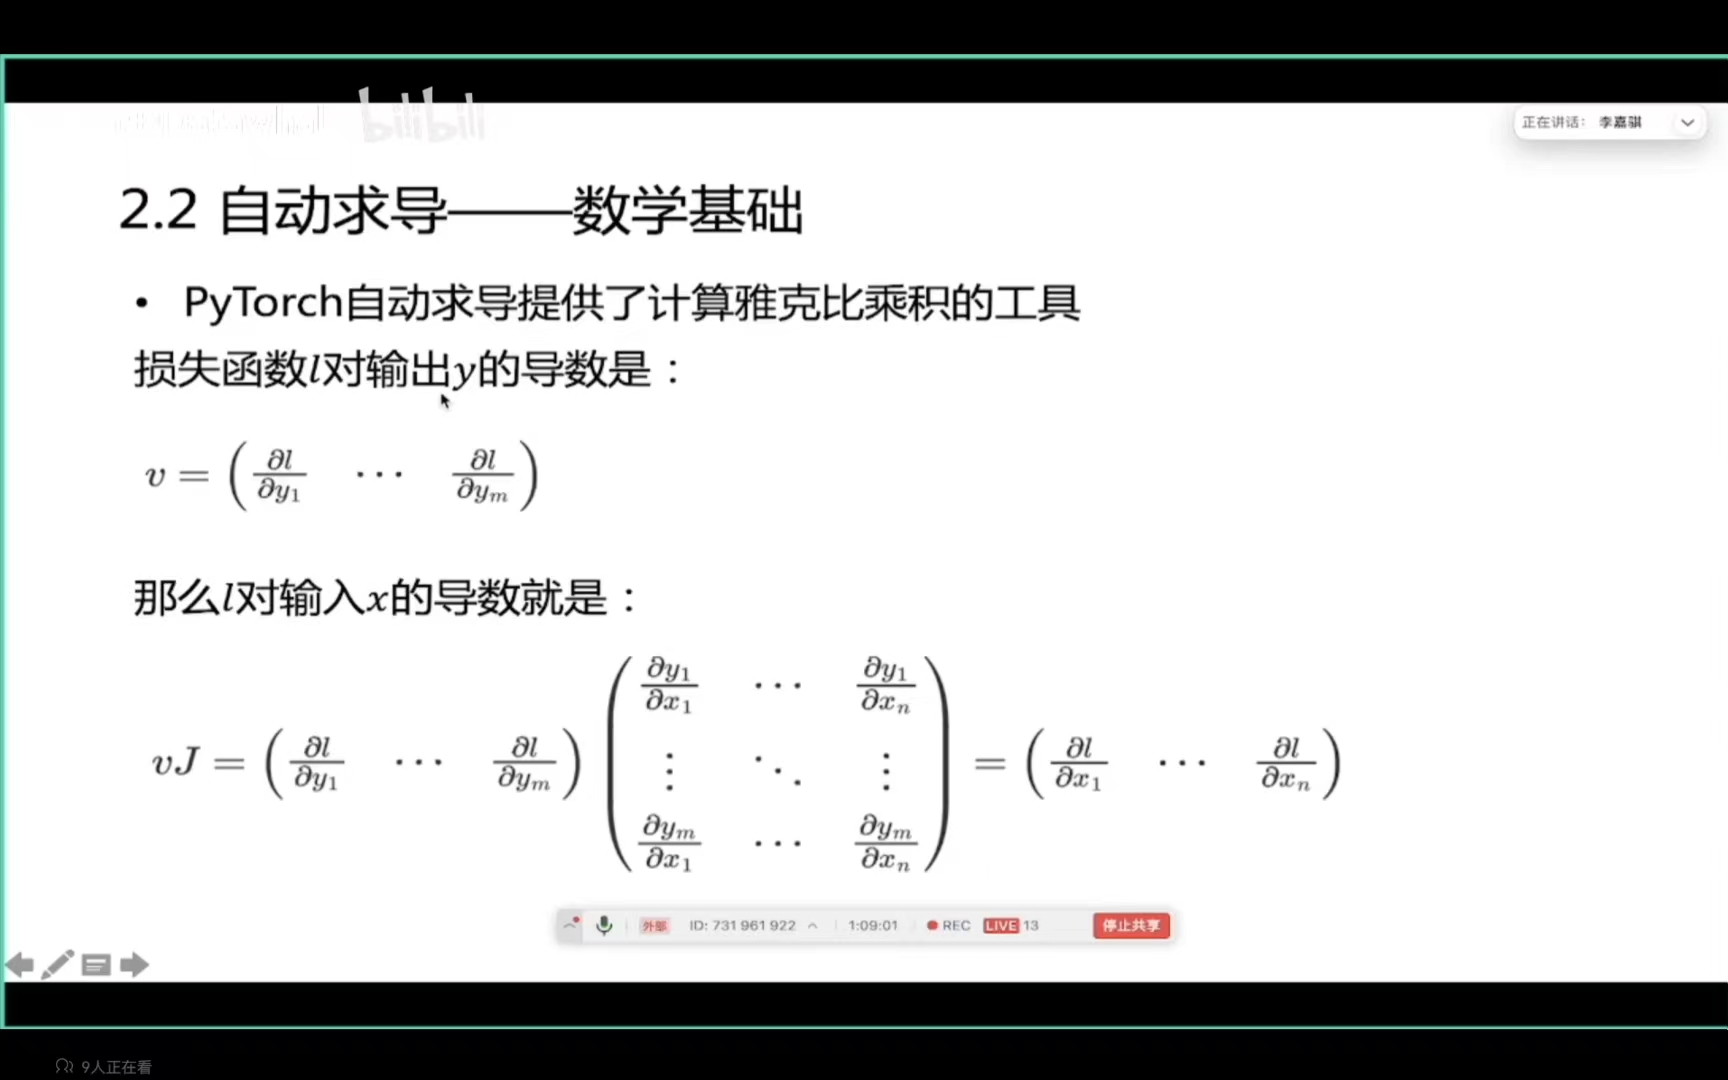
  (还没学会怎么快速手写公式，哈哈哈)

- 张量和运算结合起来创建动态计算图


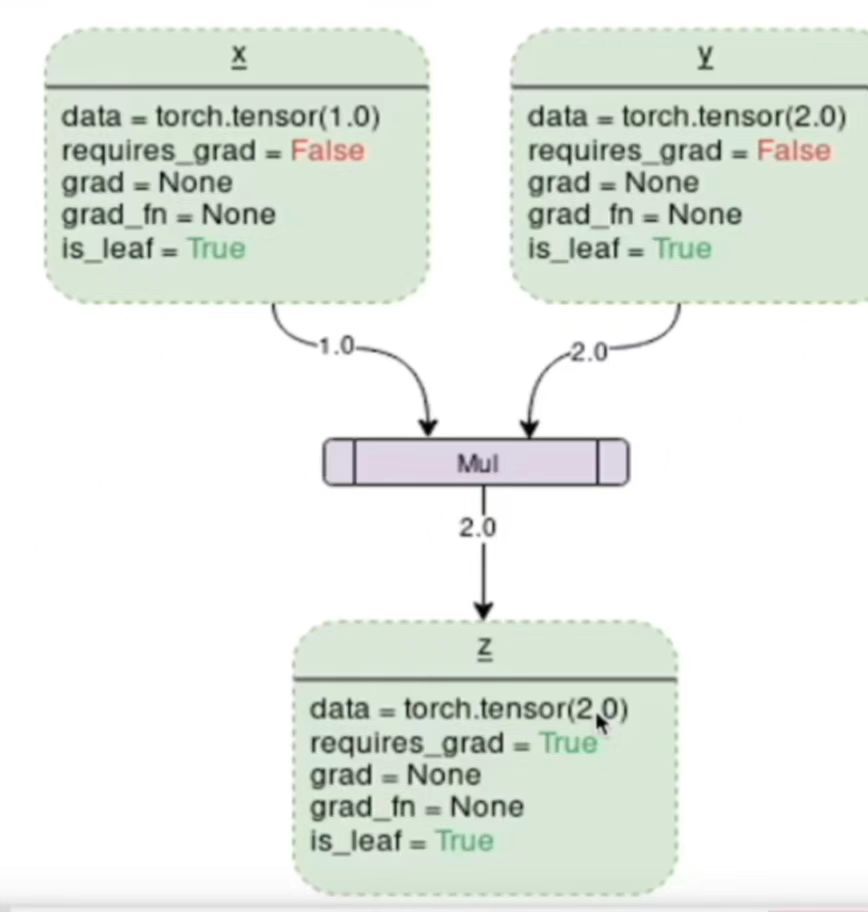

## 2.2自动求导——数学基础
- 静态图和动态图
  主要区别在是否预先定义计算图的结构

### 代码演示

In [20]:
import torch
x1=torch.tensor(1.0,requires_grad=True)
x2=torch.tensor(2.0,requires_grad=True)
y=x1+x2
print(y)

tensor(3., grad_fn=<AddBackward0>)


In [22]:
#查看每个变量能否求导
print(x1.requires_grad)
print(x2.requires_grad)
print(y.requires_grad)

True
True
True


In [25]:
#查看每个变量导数大小，需要反向传播
y=x1+2*x2
y.backward()
print(x1.grad.data)
print(x2.grad.data)
#每次更新一次都会改变，为啥？重复返回吗？哦，原来会累积

tensor(3.)
tensor(6.)


In [26]:
#所以每次计算前需要清除当前导数值避免累计，通过optimizer实现（后面有，期待）

In [27]:
#尝试，如果不允许求导，会报错

## 2.3并行计算（没试过）
- CUDA
 - GPU
- 并行方法
  - 不同设备
  - 同一层任务分到不同的层
  - 把不同的数据分到不同的设备中
- 扩展
 - cuDNN与CUDA
   - 安装好自己给我们加速